In [2]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1056)>


In [3]:
import pandas as pd
imdb_comments = pd.read_csv('instagram_profile_imdb.csv').sort_values("posts-href")
rt_comments = pd.read_csv('instagram_profile_rottentomatoes.csv').sort_values("posts-href")
#merging the two comments dataframes

frames = [imdb_comments, rt_comments]
comments_df = pd.concat(frames)
comments_df.to_csv('./instagram_comments_1.csv', index=False)

In [4]:
df = pd.read_csv('./instagram_comments_1.csv')

In [5]:
df

,web-scraper-order,web-scraper-start-url,comments,posts,posts-href,comments_scroll
0,1638143471-1536,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,xoxomarlaxoxoAbsolutely all of them and wooooo...
1,1638143471-1531,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,joost.bony1. Toy Story 3 \n2. Toy Story 2 \n3....
2,1638143471-1538,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,mrgor.rowToy Story 3 bc it got me sad by the t...
3,1638143471-1532,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,"ciaran.flynn07For me, it’s Toy Story 3. Not on..."
4,1638143471-1526,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,imdbVerified“We've done our duty. Andy's grown...
...,...,...,...,...,...,...
1034,1638143905-2188,https://www.instagram.com/rottentomatoes/,NaN,NaN,https://www.instagram.com/p/CWbx0B0hE7h/,semperfiguy8Great movie1w4 likes
1035,1638143905-2183,https://www.instagram.com/rottentomatoes/,NaN,NaN,https://www.instagram.com/p/CWbx0B0hE7h/,cliff_browerRemake was a disgrace1w19 likes
1036,1638143905-2181,https://www.instagram.com/rottentomatoes/,NaN,NaN,https://www.instagram.com/p/CWbx0B0hE7h/,hocusscrotusIt literally has the best score a ...
1037,1638143905-2184,https://www.instagram.com/rottentomatoes/,NaN,NaN,https://www.instagram.com/p/CWbx0B0hE7h/,brandon_corderoThor?1w19 likes


In [6]:
#!pip install wordcloud
#!pip uninstall spacy --yes
!pip install -U spacy 


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [7]:
## Data cleaning
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#import spacy

#nlp = spacy.load('en', disable=['parser', 'ner'])


In [8]:
'''The first pre-processing step we’ll do is transform all comments_scroll 
in new_comments_scroll into lower case and create a new column comments_scroll.
'''
df['new_comments_scroll'] = df['comments_scroll'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['new_comments_scroll'].head()

0    xoxomarlaxoxoabsolutely all of them and wooooo...
1    joost.bony1. toy story 3 2. toy story 2 3. toy...
2    mrgor.rowtoy story 3 bc it got me sad by the t...
3    ciaran.flynn07for me, it’s toy story 3. not on...
4    imdbverified“we've done our duty. andy's grown...
Name: new_comments_scroll, dtype: object

In [9]:
#Next, we will remove punctuation:
df['new_comments_scroll'] = df['new_comments_scroll'].str.replace('[^\w\s]','')
df['new_comments_scroll'].head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0    xoxomarlaxoxoabsolutely all of them and wooooo...
1    joostbony1 toy story 3 2 toy story 2 3 toy sto...
2    mrgorrowtoy story 3 bc it got me sad by the ti...
3    ciaranflynn07for me its toy story 3 not only i...
4    imdbverifiedweve done our duty andys grown up ...
Name: new_comments_scroll, dtype: object

In [10]:
#there were emoji’s used so I will remove those

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['new_comments_scroll'] = df['new_comments_scroll'].apply(lambda x: remove_emoji(x))


In [11]:
# removing stopwords

stop = stopwords.words('english')
df['new_comments_scroll'] = df['new_comments_scroll'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(20)

,web-scraper-order,web-scraper-start-url,comments,posts,posts-href,comments_scroll,new_comments_scroll
0,1638143471-1536,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,xoxomarlaxoxoAbsolutely all of them and wooooo...,xoxomarlaxoxoabsolutely woooooody best charact...
1,1638143471-1531,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,joost.bony1. Toy Story 3 \n2. Toy Story 2 \n3....,joostbony1 toy story 3 2 toy story 2 3 toy sto...
2,1638143471-1538,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,mrgor.rowToy Story 3 bc it got me sad by the t...,mrgorrowtoy story 3 bc got sad time credits ro...
3,1638143471-1532,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,"ciaran.flynn07For me, it’s Toy Story 3. Not on...",ciaranflynn07for toy story 3 favourite toy sto...
4,1638143471-1526,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,imdbVerified“We've done our duty. Andy's grown...,imdbverifiedweve done duty andys grown toystor...
5,1638143471-1537,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,marysaylisnkaIn their speeches they call3w136 ...,marysaylisnkain speeches call3w136 likesreply
6,1638143471-1527,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,the_minimalist____#13wReply,the_minimalist____13wreply
7,1638143471-1530,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,eden_rahavToy story 2 always has been my favor...,eden_rahavtoy story 2 always favorite epic ope...
8,1638143471-1534,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,aminalenzzPOSI VIBES ONLY!3w216 likesReply,aminalenzzposi vibes only3w216 likesreply
9,1638143471-1535,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,gen___d3😍3w2 likesReply,gen___d33w2 likesreply


In [12]:
## apply lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['new_comments_scroll'] = df['new_comments_scroll'].apply(lambda x: lemmatizer.lemmatize(x))


In [13]:

df['scores'] = df['new_comments_scroll'].apply(lambda Description: sid.polarity_scores(Description))
df.head()

,web-scraper-order,web-scraper-start-url,comments,posts,posts-href,comments_scroll,new_comments_scroll,scores
0,1638143471-1536,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,xoxomarlaxoxoAbsolutely all of them and wooooo...,xoxomarlaxoxoabsolutely woooooody best charact...,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp..."
1,1638143471-1531,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,joost.bony1. Toy Story 3 \n2. Toy Story 2 \n3....,joostbony1 toy story 3 2 toy story 2 3 toy sto...,"{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'comp..."
2,1638143471-1538,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,mrgor.rowToy Story 3 bc it got me sad by the t...,mrgorrowtoy story 3 bc got sad time credits ro...,"{'neg': 0.246, 'neu': 0.556, 'pos': 0.198, 'co..."
3,1638143471-1532,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,"ciaran.flynn07For me, it’s Toy Story 3. Not on...",ciaranflynn07for toy story 3 favourite toy sto...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1638143471-1526,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,imdbVerified“We've done our duty. Andy's grown...,imdbverifiedweve done duty andys grown toystor...,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp..."


In [14]:
df.head(20)

,web-scraper-order,web-scraper-start-url,comments,posts,posts-href,comments_scroll,new_comments_scroll,scores
0,1638143471-1536,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,xoxomarlaxoxoAbsolutely all of them and wooooo...,xoxomarlaxoxoabsolutely woooooody best charact...,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp..."
1,1638143471-1531,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,joost.bony1. Toy Story 3 \n2. Toy Story 2 \n3....,joostbony1 toy story 3 2 toy story 2 3 toy sto...,"{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'comp..."
2,1638143471-1538,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,mrgor.rowToy Story 3 bc it got me sad by the t...,mrgorrowtoy story 3 bc got sad time credits ro...,"{'neg': 0.246, 'neu': 0.556, 'pos': 0.198, 'co..."
3,1638143471-1532,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,"ciaran.flynn07For me, it’s Toy Story 3. Not on...",ciaranflynn07for toy story 3 favourite toy sto...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1638143471-1526,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,imdbVerified“We've done our duty. Andy's grown...,imdbverifiedweve done duty andys grown toystor...,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp..."
5,1638143471-1537,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,marysaylisnkaIn their speeches they call3w136 ...,marysaylisnkain speeches call3w136 likesreply,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,1638143471-1527,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,the_minimalist____#13wReply,the_minimalist____13wreply,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,1638143471-1530,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,eden_rahavToy story 2 always has been my favor...,eden_rahavtoy story 2 always favorite epic ope...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
8,1638143471-1534,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,aminalenzzPOSI VIBES ONLY!3w216 likesReply,aminalenzzposi vibes only3w216 likesreply,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,1638143471-1535,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,gen___d3😍3w2 likesReply,gen___d33w2 likesreply,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [15]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])

## grouping by movie 
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

In [17]:
!pip install emoji


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [18]:
df_grouped = df.groupby('posts-href').mean()
df_grouped.loc[df_grouped.compound>0,'sentiment_type']='POSITIVE'
df_grouped.loc[df_grouped.compound==0,'sentiment_type']='NEUTRAL'
df_grouped.loc[df_grouped.compound<0,'sentiment_type']='NEGATIVE'
df_grouped
import emoji
df_grouped['sentiment_emoji']=''
df_grouped.loc[df_grouped.compound>0,'sentiment_emoji']=emoji.emojize(":grinning_face_with_big_eyes:")
df_grouped.loc[df_grouped.compound==0,'sentiment_emoji']=u"\u2639\uFE0F"
df_grouped.loc[df_grouped.compound<0,'sentiment_emoji']=u"\U0001F610"
df_grouped
#df_grouped['icons'] = df_grouped['sentiment_emoji'].apply(lambda x: emoji.emojize(x, use_aliases=True))



,comments,posts,compound,sentiment_type,sentiment_emoji
posts-href,,,,,
https://www.instagram.com/p/CV-wV9LtXwi/,NaN,NaN,0.209031,POSITIVE,😃
https://www.instagram.com/p/CV0rAr9LE06/,NaN,NaN,0.125631,POSITIVE,😃
https://www.instagram.com/p/CV0zjIjNmn2/,NaN,NaN,0.312054,POSITIVE,😃
https://www.instagram.com/p/CV3VpUvvywV/,NaN,NaN,0.172115,POSITIVE,😃
https://www.instagram.com/p/CV3fKF6MDnf/,NaN,NaN,0.315854,POSITIVE,😃
...,...,...,...,...,...
https://www.instagram.com/p/CWbZKXNr_8n/,NaN,NaN,0.169508,POSITIVE,😃
https://www.instagram.com/p/CWbgoipLyBv/,NaN,NaN,0.440869,POSITIVE,😃
https://www.instagram.com/p/CWbl0KAt8PI/,NaN,NaN,0.138615,POSITIVE,😃


In [19]:
df.head()

,web-scraper-order,web-scraper-start-url,comments,posts,posts-href,comments_scroll,new_comments_scroll,scores,compound,sentiment_type
0,1638143471-1536,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,xoxomarlaxoxoAbsolutely all of them and wooooo...,xoxomarlaxoxoabsolutely woooooody best charact...,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp...",0.6369,POSITIVE
1,1638143471-1531,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,joost.bony1. Toy Story 3 \n2. Toy Story 2 \n3....,joostbony1 toy story 3 2 toy story 2 3 toy sto...,"{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'comp...",0.3612,POSITIVE
2,1638143471-1538,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,mrgor.rowToy Story 3 bc it got me sad by the t...,mrgorrowtoy story 3 bc got sad time credits ro...,"{'neg': 0.246, 'neu': 0.556, 'pos': 0.198, 'co...",-0.1531,NEGATIVE
3,1638143471-1532,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,"ciaran.flynn07For me, it’s Toy Story 3. Not on...",ciaranflynn07for toy story 3 favourite toy sto...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
4,1638143471-1526,https://www.instagram.com/imdb/,NaN,NaN,https://www.instagram.com/p/CV-wV9LtXwi/,imdbVerified“We've done our duty. Andy's grown...,imdbverifiedweve done duty andys grown toystor...,"{'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...",0.6486,POSITIVE


<AxesSubplot:title={'center':'sentiment analysis'}>

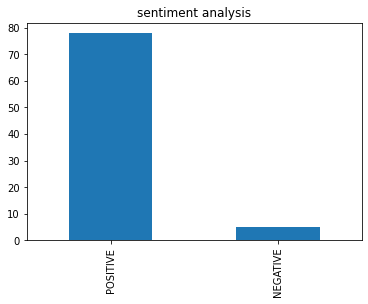

In [31]:
df_grouped.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")


In [32]:
df_grouped['id_temp'] = df_grouped.index.str[28:]

In [33]:


df_grouped['id'] = df_grouped['id_temp'].apply(lambda x: x.partition('/')[0])


In [34]:
df_grouped

,comments,posts,compound,sentiment_type,sentiment_emoji,id_temp,id
posts-href,,,,,,,
https://www.instagram.com/p/CV-wV9LtXwi/,NaN,NaN,0.209031,POSITIVE,😃,CV-wV9LtXwi/,CV-wV9LtXwi
https://www.instagram.com/p/CV0rAr9LE06/,NaN,NaN,0.125631,POSITIVE,😃,CV0rAr9LE06/,CV0rAr9LE06
https://www.instagram.com/p/CV0zjIjNmn2/,NaN,NaN,0.312054,POSITIVE,😃,CV0zjIjNmn2/,CV0zjIjNmn2
https://www.instagram.com/p/CV3VpUvvywV/,NaN,NaN,0.172115,POSITIVE,😃,CV3VpUvvywV/,CV3VpUvvywV
https://www.instagram.com/p/CV3fKF6MDnf/,NaN,NaN,0.315854,POSITIVE,😃,CV3fKF6MDnf/,CV3fKF6MDnf
...,...,...,...,...,...,...,...
https://www.instagram.com/p/CWbZKXNr_8n/,NaN,NaN,0.169508,POSITIVE,😃,CWbZKXNr_8n/,CWbZKXNr_8n
https://www.instagram.com/p/CWbgoipLyBv/,NaN,NaN,0.440869,POSITIVE,😃,CWbgoipLyBv/,CWbgoipLyBv
https://www.instagram.com/p/CWbl0KAt8PI/,NaN,NaN,0.138615,POSITIVE,😃,CWbl0KAt8PI/,CWbl0KAt8PI


In [80]:
## Geting movies ratings 
review_df = pd.read_csv('imdb_reviews.csv')

# clean reviws data Review_body
review_df['new_Review_body']=''
review_df['new_Review_body'] = review_df['Review_body'].apply(lambda x: " ".join(x.lower() for x in x.split()))
review_df['new_Review_body'].head()
#Next, we will remove punctuation:
review_df['new_Review_body'] = review_df['new_Review_body'].str.replace('[^\w\s]','')
review_df['new_Review_body'].head()
#Next, we will remove punctuation:
review_df['new_Review_body'] = review_df['new_Review_body'].str.replace('[^\w\s]','')
review_df['new_Review_body'].head()

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
review_df['new_Review_body'] = review_df['new_Review_body'].apply(lambda x: remove_emoji(x))

# removing stopwords

stop = stopwords.words('english')
review_df['new_Review_body'] = review_df['new_Review_body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
review_df.head(20)
## apply lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
review_df['new_Review_body'] = review_df['new_Review_body'].apply(lambda x: lemmatizer.lemmatize(x))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


In [81]:
review_df

,Unnamed: 0,Unnamed: 0.1,User_name,Review title,Review Rating,Review date,Review_body,Movie_name,new_Review_body
0,0,0,Sleepin_Dragon,Surprisingly good.,8/10,21 November 2021,"I'll be honest, after the last Ghostbusters mo...",Ghostbusters: Afterlife,ill honest last ghostbusters movie wasnt keen ...
1,1,1,kosmasp,Ghostbusters the next Generation,9/10,23 November 2021,I have to admit I had certain expectations and...,Ghostbusters: Afterlife,admit certain expectations thought seeing cert...
2,2,2,CinemaSerf,Good cast but too little story.,6/10,23 November 2021,"""Callie"" (Carrie Coon) is a bit short of cash,...",Ghostbusters: Afterlife,callie carrie coon bit short cash must retreat...
3,3,3,Calicodreamin,Worthy successor,7/10,20 November 2021,This reboot of sorts did it all right in terms...,Ghostbusters: Afterlife,reboot sorts right terms respectful original m...
4,4,4,george.schmidt,Reitman's valentine to the original comedy hor...,8/10,22 November 2021,GHOSTBUSTERS: AFTERLIFE (2021) *** Carrie Coon...,Ghostbusters: Afterlife,ghostbusters afterlife 2021 carrie coon paul r...
...,...,...,...,...,...,...,...,...,...
2343,2343,7,mwilson1976,A kids drama project gets swept up in a nation...,3/10,29 May 2020,Purporting to be a reconstruction of real even...,Suffer Little Children,purporting reconstruction real events took pla...
2344,2344,8,Johan_Wondering_on_Waves,Not too bad for having no budget,5/10,14 January 2015,Had this been done by professionals I doubt I ...,Suffer Little Children,done professionals doubt would given 3 however...
2345,2345,9,juderussell-84094,Admirable But Slow No-Budget Horror,4/10,18 February 2020,"Look, this movie is bad. Really bad, but there...",Suffer Little Children,look movie bad really bad theres something end...
2346,2346,10,tania-chivers,Its true you had to be in it to love it!!,5/10,9 October 2007,I remember this film as being the best and exc...,Suffer Little Children,remember film best exciting summer life 1112 y...


In [90]:
review_df['scores'] = review_df['new_Review_body'].apply(lambda Description: sid.polarity_scores(Description))
review_df['sentiment_score'] = review_df['scores'].apply(lambda score_dict: score_dict['compound'])
review_df['rating'] = review_df['Review Rating'].apply(lambda x: int(x.partition('/')[0])/10)

## grouping by movie 
review_df['sentiment_type']=''
review_df.loc[review_df.compound>0,'sentiment_type']='POSITIVE'
review_df.loc[review_df.compound==0,'sentiment_type']='NEUTRAL'
review_df.loc[review_df.compound<0,'sentiment_type']='NEGATIVE'

review_df_grouped = review_df.groupby('Movie_name').mean()
review_df_grouped.loc[review_df_grouped.compound>0,'sentiment_type']='POSITIVE'
review_df_grouped.loc[review_df_grouped.compound==0,'sentiment_type']='NEUTRAL'
review_df_grouped.loc[review_df_grouped.compound<0,'sentiment_type']='NEGATIVE'
review_df_grouped
import emoji
review_df_grouped['sentiment_emoji']=''
review_df_grouped.loc[review_df_grouped.compound>0,'sentiment_emoji']=emoji.emojize(":grinning_face_with_big_eyes:")
review_df_grouped.loc[review_df_grouped.compound==0,'sentiment_emoji']=u"\u2639\uFE0F"
review_df_grouped.loc[review_df_grouped.compound<0,'sentiment_emoji']=u"\U0001F610"
review_df_grouped
#df_grouped['icons'] = df_grouped['sentiment_emoji'].apply(lambda x: emoji.emojize(x, use_aliases=True))
review_df_grouped['error'] = review_df_grouped['rating'] - review_df_grouped['sentiment_score']


,Unnamed: 0,Unnamed: 0.1,compound,rating,sentiment_score,sentiment_type,sentiment_emoji,error
Movie_name,,,,,,,,
A Hard Day's Night,2283.5,43.5,0.907964,0.805682,0.907964,POSITIVE,😃,-0.102282
Antim: The Final Truth,1622.0,49.0,0.687184,0.618182,0.687184,POSITIVE,😃,-0.069002
Belfast,1453.0,26.0,0.695908,0.709434,0.695908,POSITIVE,😃,0.013526
C'mon C'mon,1677.5,5.5,0.764592,0.658333,0.764592,POSITIVE,😃,-0.106258
Clifford the Big Red Dog,1382.0,44.0,0.804725,0.707865,0.804725,POSITIVE,😃,-0.096860
Dune,238.0,45.0,0.770658,0.724176,0.770658,POSITIVE,😃,-0.046482
Elf,1526.0,46.0,0.832523,0.709677,0.832523,POSITIVE,😃,-0.122845
Encanto,910.5,47.5,0.775276,0.666667,0.775276,POSITIVE,😃,-0.108609
Eternals,424.5,47.5,0.795926,0.657292,0.795926,POSITIVE,😃,-0.138634


In [97]:
review_df_grouped['se'] = review_df_grouped['error'] * review_df_grouped['error'] 
rmse = review_df_grouped['se'].mean()
rmse

0.026445882789414423

In [36]:
review_df_grouped

,Unnamed: 0,Unnamed: 0.1,User_name,Review title,Review Rating,Review date,Review_body,Movie_name
0,0,0,Sleepin_Dragon,Surprisingly good.,8/10,21 November 2021,"I'll be honest, after the last Ghostbusters mo...",Ghostbusters: Afterlife
1,1,1,kosmasp,Ghostbusters the next Generation,9/10,23 November 2021,I have to admit I had certain expectations and...,Ghostbusters: Afterlife
2,2,2,CinemaSerf,Good cast but too little story.,6/10,23 November 2021,"""Callie"" (Carrie Coon) is a bit short of cash,...",Ghostbusters: Afterlife
3,3,3,Calicodreamin,Worthy successor,7/10,20 November 2021,This reboot of sorts did it all right in terms...,Ghostbusters: Afterlife
4,4,4,george.schmidt,Reitman's valentine to the original comedy hor...,8/10,22 November 2021,GHOSTBUSTERS: AFTERLIFE (2021) *** Carrie Coon...,Ghostbusters: Afterlife
...,...,...,...,...,...,...,...,...
2343,2343,7,mwilson1976,A kids drama project gets swept up in a nation...,3/10,29 May 2020,Purporting to be a reconstruction of real even...,Suffer Little Children
2344,2344,8,Johan_Wondering_on_Waves,Not too bad for having no budget,5/10,14 January 2015,Had this been done by professionals I doubt I ...,Suffer Little Children
2345,2345,9,juderussell-84094,Admirable But Slow No-Budget Horror,4/10,18 February 2020,"Look, this movie is bad. Really bad, but there...",Suffer Little Children
2346,2346,10,tania-chivers,Its true you had to be in it to love it!!,5/10,9 October 2007,I remember this film as being the best and exc...,Suffer Little Children


In [37]:
#The two dataframes can be compared using the href ID (which is called shortcode on the posts_df dataframe). 
#Lastly, Instagram would only allow me to scrape comments 
#that can be seen without scrolling which was about 5 per post. 

posts_df = pd.read_csv('posts_df.csv') 

In [38]:
posts_df

,id,likes,caption,imageURL,hashtags,comments,upload_date
0,CWwqeSlpbKd,10178,"“Art, in itself, is an attempt to bring order ...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['StephenSondheim'],35,2021-11-26 19:10:49
1,CWvrhQFrgHJ,5567,"From award-winning stars to incoming comets, t...",https://scontent-hou1-1.cdninstagram.com/v/t51...,[],21,2021-11-26 10:01:31
2,CWtiNseh9cO,3700,"""It was easy, that's the best way I can descri...",https://scontent-hou1-1.cdninstagram.com/v/t51...,"['AdamDriver', 'JaredLeto', 'LadyGaga', 'House...",17,2021-11-25 14:01:31
3,CWtT_9BvCjv,19167,There's always room for seconds when it comes ...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['Thanksgiving'],103,2021-11-25 11:56:43
4,CWtBuFPlRj4,4176,One of the best Turkey Day moments of all time...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['Thanksgiving'],18,2021-11-25 09:17:34
...,...,...,...,...,...,...,...
195,CTS4X4EBVjw,5073,From tweeting at #Marvel to working with #Awkw...,https://scontent-hou1-1.cdninstagram.com/v/t51...,"['Marvel', 'Awkwafina', 'SimuLiu', 'ShangChi']",31,2021-09-01 17:01:34
196,CTSX_9XJMsk,12944,You CAN have it all with @sarahshahi. The actr...,https://scontent-hou1-1.cdninstagram.com/v/t51...,"['BlackAdam', 'SexLife']",101,2021-09-01 12:18:00
197,CTR6fQ8nE1T,9542,"Happy Birthday, @Zendaya! ✨ From #SpiderManHom...",https://scontent-hou1-1.cdninstagram.com/v/t51...,"['SpiderManHomecoming', 'Euphoria', 'Zendaya']",54,2021-09-01 08:00:43
198,CTPvhpClTlL,39767,"Every mission, every sacrifice, has led him to...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['NoTimeToDie'],343,2021-08-31 11:54:10


In [39]:
hit_flop = pd.read_csv('imdb_reviews_hit_flop.csv') 

In [40]:
hit_flop

,Movie_name,Unnamed: 1
0,Ghostbusters: Afterlife,Hit
1,House of Gucci,Hit
2,Dune,Hit
3,No Time to Die,Hit
4,Eternals,Hit
5,Last Night in Soho,Flop
6,King Richard,Flop
7,Resident Evil: Welcome to Raccoon City,Flop
8,Encanto,Flop
9,Spencer,Flop


In [41]:
df.to_csv('./instagram_comments_cleaned.csv', index=False)

In [42]:
merged = pd.merge(hit_flop, review_df, on='Movie_name', how='inner')
merged['rating'] = merged['Review Rating'].apply(lambda x: int(x.partition('/')[0]))
merged['Movie_name'] = merged['Movie_name'].apply(lambda x: x.lower())
merged['Movie_name'] = merged['Movie_name'].apply(lambda x: x.replace(":",""))



In [43]:
merged_grouped = merged.groupby('Movie_name').mean()
merged_grouped

,Unnamed: 0,Unnamed: 0.1,rating
Movie_name,,,
dune,238.0,45.0,7.241758
encanto,910.5,47.5,6.666667
eternals,424.5,47.5,6.572917
ghostbusters afterlife,47.5,47.5,7.302083
house of gucci,144.0,48.0,6.814433
king richard,616.0,48.0,7.525773
last night in soho,520.0,47.0,7.389474
no time to die,330.0,46.0,7.311828
resident evil welcome to raccoon city,812.5,49.5,5.310000


In [44]:
## get id of these movies from post_df
posts_df

,id,likes,caption,imageURL,hashtags,comments,upload_date
0,CWwqeSlpbKd,10178,"“Art, in itself, is an attempt to bring order ...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['StephenSondheim'],35,2021-11-26 19:10:49
1,CWvrhQFrgHJ,5567,"From award-winning stars to incoming comets, t...",https://scontent-hou1-1.cdninstagram.com/v/t51...,[],21,2021-11-26 10:01:31
2,CWtiNseh9cO,3700,"""It was easy, that's the best way I can descri...",https://scontent-hou1-1.cdninstagram.com/v/t51...,"['AdamDriver', 'JaredLeto', 'LadyGaga', 'House...",17,2021-11-25 14:01:31
3,CWtT_9BvCjv,19167,There's always room for seconds when it comes ...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['Thanksgiving'],103,2021-11-25 11:56:43
4,CWtBuFPlRj4,4176,One of the best Turkey Day moments of all time...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['Thanksgiving'],18,2021-11-25 09:17:34
...,...,...,...,...,...,...,...
195,CTS4X4EBVjw,5073,From tweeting at #Marvel to working with #Awkw...,https://scontent-hou1-1.cdninstagram.com/v/t51...,"['Marvel', 'Awkwafina', 'SimuLiu', 'ShangChi']",31,2021-09-01 17:01:34
196,CTSX_9XJMsk,12944,You CAN have it all with @sarahshahi. The actr...,https://scontent-hou1-1.cdninstagram.com/v/t51...,"['BlackAdam', 'SexLife']",101,2021-09-01 12:18:00
197,CTR6fQ8nE1T,9542,"Happy Birthday, @Zendaya! ✨ From #SpiderManHom...",https://scontent-hou1-1.cdninstagram.com/v/t51...,"['SpiderManHomecoming', 'Euphoria', 'Zendaya']",54,2021-09-01 08:00:43
198,CTPvhpClTlL,39767,"Every mission, every sacrifice, has led him to...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['NoTimeToDie'],343,2021-08-31 11:54:10


In [45]:

posts_df['hashtags_cleaned'] = posts_df['hashtags'].apply(lambda x: "".join(x))

posts_df['hashtags_cleaned']

0                                    ['StephenSondheim']
1                                                     []
2      ['AdamDriver', 'JaredLeto', 'LadyGaga', 'House...
3                                       ['Thanksgiving']
4                                       ['Thanksgiving']
                             ...                        
195       ['Marvel', 'Awkwafina', 'SimuLiu', 'ShangChi']
196                             ['BlackAdam', 'SexLife']
197       ['SpiderManHomecoming', 'Euphoria', 'Zendaya']
198                                      ['NoTimeToDie']
199                                  ['TheSuicideSquad']
Name: hashtags_cleaned, Length: 200, dtype: object

In [46]:
posts_df['hashtags_cleaned'] = posts_df['hashtags'].apply(lambda x: x.partition(',')[0])
posts_df
posts_df['hashtags_cleaned'] = posts_df['hashtags'].apply(lambda x: ''.join(char for char in x if char.isalnum()))
posts_df['hashtags_cleaned'] = posts_df['hashtags_cleaned'].apply(lambda x: re.sub(r"(\w)([A-Z])", r"\1 \2", x))
posts_df['hashtags_cleaned'] = posts_df['hashtags_cleaned'].apply(lambda x: x.lower())



posts_df


,id,likes,caption,imageURL,hashtags,comments,upload_date,hashtags_cleaned
0,CWwqeSlpbKd,10178,"“Art, in itself, is an attempt to bring order ...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['StephenSondheim'],35,2021-11-26 19:10:49,stephen sondheim
1,CWvrhQFrgHJ,5567,"From award-winning stars to incoming comets, t...",https://scontent-hou1-1.cdninstagram.com/v/t51...,[],21,2021-11-26 10:01:31,
2,CWtiNseh9cO,3700,"""It was easy, that's the best way I can descri...",https://scontent-hou1-1.cdninstagram.com/v/t51...,"['AdamDriver', 'JaredLeto', 'LadyGaga', 'House...",17,2021-11-25 14:01:31,adam driver jared leto lady gaga house of gucci
3,CWtT_9BvCjv,19167,There's always room for seconds when it comes ...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['Thanksgiving'],103,2021-11-25 11:56:43,thanksgiving
4,CWtBuFPlRj4,4176,One of the best Turkey Day moments of all time...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['Thanksgiving'],18,2021-11-25 09:17:34,thanksgiving
...,...,...,...,...,...,...,...,...
195,CTS4X4EBVjw,5073,From tweeting at #Marvel to working with #Awkw...,https://scontent-hou1-1.cdninstagram.com/v/t51...,"['Marvel', 'Awkwafina', 'SimuLiu', 'ShangChi']",31,2021-09-01 17:01:34,marvel awkwafina simu liu shang chi
196,CTSX_9XJMsk,12944,You CAN have it all with @sarahshahi. The actr...,https://scontent-hou1-1.cdninstagram.com/v/t51...,"['BlackAdam', 'SexLife']",101,2021-09-01 12:18:00,black adam sex life
197,CTR6fQ8nE1T,9542,"Happy Birthday, @Zendaya! ✨ From #SpiderManHom...",https://scontent-hou1-1.cdninstagram.com/v/t51...,"['SpiderManHomecoming', 'Euphoria', 'Zendaya']",54,2021-09-01 08:00:43,spider man homecoming euphoria zendaya
198,CTPvhpClTlL,39767,"Every mission, every sacrifice, has led him to...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['NoTimeToDie'],343,2021-08-31 11:54:10,no time to die


In [58]:
merged_id = pd.merge(merged_grouped, posts_df, left_on='Movie_name',right_on='hashtags_cleaned', how='inner')
merged_id

,Unnamed: 0,Unnamed: 0.1,rating,id,likes,caption,imageURL,hashtags,comments,upload_date,hashtags_cleaned
0,238.0,45.0,7.241758,CVbSrWDvy78,95013,Does #Dune live up to the hype? 🔥Share your sp...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['Dune'],1360,2021-10-24 16:27:27,dune
1,910.5,47.5,6.666667,CUav1AEBEKY,4090,Find your magic. ✨ Watch the new trailer for ...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['Encanto'],30,2021-09-29 14:51:50,encanto
2,424.5,47.5,6.572917,CV_gb7aBngk,5646,Which Eternal has the best superpower? 💫 Who w...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['Eternals'],41,2021-11-07 17:01:07,eternals
3,424.5,47.5,6.572917,CU5hoQ1vlVE,26894,Meet the #Eternals 💫,https://scontent-hou1-1.cdninstagram.com/v/t51...,['Eternals'],167,2021-10-11 13:43:55,eternals
4,144.0,48.0,6.814433,CWE7mdVpkeV,47973,Can confirm we are fully off the deep end for ...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['HouseOfGucci'],193,2021-11-09 19:33:54,house of gucci
5,144.0,48.0,6.814433,CVlRmzrNJbm,7973,"""They had it all: wealth, style, power. Who wo...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['HouseOfGucci'],50,2021-10-28 13:30:57,house of gucci
6,520.0,47.0,7.389474,CVoEIxSLQ-y,3863,"The @lastnightinsohomovie director, star, and ...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['LastNightInSoho'],11,2021-10-29 15:31:09,last night in soho
7,520.0,47.0,7.389474,CVgU-rvP5bH,60024,"Last Night in LA ✨ @anyataylorjoy, @thomasin.m...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['LastNightInSoho'],98,2021-10-26 15:23:46,last night in soho
8,520.0,47.0,7.389474,CTaZmvNPC1M,38818,Ciao bella 🌸 @anyataylorjoy has arrived in Ven...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['LastNightInSoho'],99,2021-09-04 15:05:57,last night in soho
9,330.0,46.0,7.311828,CTPvhpClTlL,39767,"Every mission, every sacrifice, has led him to...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['NoTimeToDie'],343,2021-08-31 11:54:10,no time to die


In [74]:
merged_id['id'] = merged_id['id'].apply(lambda x: x.lower())
merged_id['id'] = merged_id['id'].apply(lambda x: ''.join(char for char in x if char.isalnum()))
df_grouped['id'] = df_grouped['id'].apply(lambda x: ''.join(char for char in x if char.isalnum()))

movie_list = list(merged_id['id'])

In [75]:

#df_grouped[df_grouped['id'] in movie_list]
df_grouped.loc[df_grouped['id'].isin(movie_list)]

,comments,posts,compound,sentiment_type,sentiment_emoji,id_temp,id
posts-href,,,,,,,
https://www.instagram.com/p/CV_gb7aBngk/,NaN,NaN,0.198108,POSITIVE,😃,CV_gb7aBngk/,cvgb7abngk
https://www.instagram.com/p/CVbSrWDvy78/,NaN,NaN,0.206431,POSITIVE,😃,CVbSrWDvy78/,cvbsrwdvy78
https://www.instagram.com/p/CVgU-rvP5bH/,NaN,NaN,0.100331,POSITIVE,😃,CVgU-rvP5bH/,cvgurvp5bh
https://www.instagram.com/p/CVlRmzrNJbm/,NaN,NaN,0.249385,POSITIVE,😃,CVlRmzrNJbm/,cvlrmzrnjbm
https://www.instagram.com/p/CVoEIxSLQ-y/,NaN,NaN,0.036233,POSITIVE,😃,CVoEIxSLQ-y/,cvoeixslqy
https://www.instagram.com/p/CWE7mdVpkeV/,NaN,NaN,0.115508,POSITIVE,😃,CWE7mdVpkeV/,cwe7mdvpkev


In [71]:
df_grouped['id']

posts-href
https://www.instagram.com/p/CV-wV9LtXwi/    cv-wv9ltxwi
https://www.instagram.com/p/CV0rAr9LE06/    cv0rar9le06
https://www.instagram.com/p/CV0zjIjNmn2/    cv0zjijnmn2
https://www.instagram.com/p/CV3VpUvvywV/    cv3vpuvvywv
https://www.instagram.com/p/CV3fKF6MDnf/    cv3fkf6mdnf
                                               ...     
https://www.instagram.com/p/CWbZKXNr_8n/    cwbzkxnr_8n
https://www.instagram.com/p/CWbgoipLyBv/    cwbgoiplybv
https://www.instagram.com/p/CWbl0KAt8PI/    cwbl0kat8pi
https://www.instagram.com/p/CWbsqJDBl0s/    cwbsqjdbl0s
https://www.instagram.com/p/CWbx0B0hE7h/    cwbx0b0he7h
Name: id, Length: 83, dtype: object

In [50]:
merged_id['id'] = merged_id['id'].apply(lambda x: x.lower())
df_grouped['id'] = df_grouped['id'].apply(lambda x: x.lower())

merged_final = pd.merge(merged_id, df_grouped, on='id', how='inner')
merged_final

,Unnamed: 0,Unnamed: 0.1,rating,id,likes,caption,imageURL,hashtags,comments_x,upload_date,hashtags_cleaned,comments_y,posts,compound,sentiment_type,sentiment_emoji,id_temp
0,238.0,45.0,7.241758,cvbsrwdvy78,95013,Does #Dune live up to the hype? 🔥Share your sp...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['Dune'],1360,2021-10-24 16:27:27,dune,NaN,NaN,0.206431,POSITIVE,😃,CVbSrWDvy78/
1,424.5,47.5,6.572917,cv_gb7abngk,5646,Which Eternal has the best superpower? 💫 Who w...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['Eternals'],41,2021-11-07 17:01:07,eternals,NaN,NaN,0.198108,POSITIVE,😃,CV_gb7aBngk/
2,144.0,48.0,6.814433,cwe7mdvpkev,47973,Can confirm we are fully off the deep end for ...,https://scontent-hou1-1.cdninstagram.com/v/t51...,['HouseOfGucci'],193,2021-11-09 19:33:54,house of gucci,NaN,NaN,0.115508,POSITIVE,😃,CWE7mdVpkeV/
3,144.0,48.0,6.814433,cvlrmzrnjbm,7973,"""They had it all: wealth, style, power. Who wo...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['HouseOfGucci'],50,2021-10-28 13:30:57,house of gucci,NaN,NaN,0.249385,POSITIVE,😃,CVlRmzrNJbm/
4,520.0,47.0,7.389474,cvoeixslq-y,3863,"The @lastnightinsohomovie director, star, and ...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['LastNightInSoho'],11,2021-10-29 15:31:09,last night in soho,NaN,NaN,0.036233,POSITIVE,😃,CVoEIxSLQ-y/
5,520.0,47.0,7.389474,cvgu-rvp5bh,60024,"Last Night in LA ✨ @anyataylorjoy, @thomasin.m...",https://scontent-hou1-1.cdninstagram.com/v/t51...,['LastNightInSoho'],98,2021-10-26 15:23:46,last night in soho,NaN,NaN,0.100331,POSITIVE,😃,CVgU-rvP5bH/


In [51]:
merged_final[['id','hashtags_cleaned', 'rating','likes', 'sentiment_type', 'compound','sentiment_emoji']]

,id,hashtags_cleaned,rating,likes,sentiment_type,compound,sentiment_emoji
0,cvbsrwdvy78,dune,7.241758,95013,POSITIVE,0.206431,😃
1,cv_gb7abngk,eternals,6.572917,5646,POSITIVE,0.198108,😃
2,cwe7mdvpkev,house of gucci,6.814433,47973,POSITIVE,0.115508,😃
3,cvlrmzrnjbm,house of gucci,6.814433,7973,POSITIVE,0.249385,😃
4,cvoeixslq-y,last night in soho,7.389474,3863,POSITIVE,0.036233,😃
5,cvgu-rvp5bh,last night in soho,7.389474,60024,POSITIVE,0.100331,😃


In [56]:
review_df['rating'] = review_df['Review Rating'].apply(lambda x: int(x.partition('/')[0]))
review_df['Movie_name'] = review_df['Movie_name'].apply(lambda x: x.lower())
review_df['Movie_name'] = review_df['Movie_name'].apply(lambda x: x.replace(":",""))
review_df_grouped = review_df.groupby('Movie_name').mean()


merged_id_full = pd.merge(review_df_grouped, posts_df, left_on='Movie_name',right_on='hashtags_cleaned', how='inner')
merged_id_full


,Unnamed: 0,Unnamed: 0.1,rating,id,likes,caption,imageURL,hashtags,comments_x,upload_date,hashtags_cleaned,comments_y,posts,compound,sentiment_type,sentiment_emoji,id_temp


In [57]:
df_grouped

,comments,posts,compound,sentiment_type,sentiment_emoji,id_temp,id
posts-href,,,,,,,
https://www.instagram.com/p/CV-wV9LtXwi/,NaN,NaN,0.209031,POSITIVE,😃,CV-wV9LtXwi/,cv-wv9ltxwi
https://www.instagram.com/p/CV0rAr9LE06/,NaN,NaN,0.125631,POSITIVE,😃,CV0rAr9LE06/,cv0rar9le06
https://www.instagram.com/p/CV0zjIjNmn2/,NaN,NaN,0.312054,POSITIVE,😃,CV0zjIjNmn2/,cv0zjijnmn2
https://www.instagram.com/p/CV3VpUvvywV/,NaN,NaN,0.172115,POSITIVE,😃,CV3VpUvvywV/,cv3vpuvvywv
https://www.instagram.com/p/CV3fKF6MDnf/,NaN,NaN,0.315854,POSITIVE,😃,CV3fKF6MDnf/,cv3fkf6mdnf
...,...,...,...,...,...,...,...
https://www.instagram.com/p/CWbZKXNr_8n/,NaN,NaN,0.169508,POSITIVE,😃,CWbZKXNr_8n/,cwbzkxnr_8n
https://www.instagram.com/p/CWbgoipLyBv/,NaN,NaN,0.440869,POSITIVE,😃,CWbgoipLyBv/,cwbgoiplybv
https://www.instagram.com/p/CWbl0KAt8PI/,NaN,NaN,0.138615,POSITIVE,😃,CWbl0KAt8PI/,cwbl0kat8pi
